CMP6202

# Objectives
In this lab you will:
* Revise basic univariate data analysis techniques to better understand how individual variables / attributes are distributed
*	Apply basic bivariate visualisation techniques to better identify the relationships between variables
* Apply Pearson's correlation to investigate the linear relationships that may be present amongst variables / attributes in our datasets
* Define the nominal / categorical encoding technique "one-hot" encoding
* Linear Regression




# Library imports



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
    
# I added these two of my own, which was probably necessary due to my use of VSCode over Colab.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Data sets

In [4]:
# Downloaded from UCI Machine learning repository
# https://archive.ics.uci.edu/ml/datasets/iris
# "Data Folder" -> iris.data
# "Data Folder" -> iris.names will give us some more data on the attributes

df_iris = pd.read_csv('../labData/iris.data',
                        names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We'll now use the train-test splitter inside the SKLearn package to give us two subsets of data
one for training and one for testing, divided into the
features (the X values) and the targets (the Y values)
the \ allows us to have a line break in the code

In [3]:
X = df_iris.drop(columns = 'Species')

In [4]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = df_iris['Species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# The dataframe with all our test data
# we will save this for later
df_iris_test = X_test
df_iris_test['Species'] = y_test
df_iris_test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [8]:
# The dataframe with all our training data
# we will use this for EDA
# and model building
# Note: be careful, the smaller the dataset (in terms of records)
# the more likely that the train and test samples might have larger differences
df_iris_train = X_train
df_iris_train["Species"] = y_train
df_iris_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
4,5.0,3.6,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor


We can use the describe() method to obtain valuable statistical information about data within our data frame. When dealing with numeric values it provides attributes such as:


*   A count of the amount of items for that variable / column
*   The [mean average](https://simple.wikipedia.org/wiki/Mean) for that variable / column
*   The [standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation) of that column
*   The minimum value found within that variable / column
*   The [percentile values](https://simple.wikipedia.org/wiki/Percentile) for that variable / column (25%, 50%, 75%). For more information on percentiles, see [here](https://www.w3schools.com/python/python_ml_percentile.asp)
*   The maximum value found within that variable / column



In [9]:
# There's no description of the Species column simply because it isn't numeric, so most insights will be NaN.
df_iris_train.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.035714,3.808036,1.213393
std,0.819123,0.433892,1.734085,0.749233
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


In [11]:
# We can include all columns by using the optional argument include with the value 'all'
df_iris_train.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,112.000000,112.000000,112.000000,112.000000,112
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,39
mean,5.830357,3.035714,3.808036,1.213393,NaN
std,0.819123,0.433892,1.734085,0.749233,NaN
min,4.300000,2.000000,1.100000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# The "gist" of Exploratory Data Analysis

Exploratory data analysis is usually the first step to come after data collection before we start to perform any real ML modelling. To understand how to effectively and efficiently handle our data exploring it and drawing out key insights before attempting to represent it to a Machine Learning algorithm is key.

## Overall EDA process


1.   Ask questions
2.   Wrangle the data
3.   Explore the data
4.   Draw conclusions based on the explorations
5.   Communicate those conclusions
6.   Repeat 1-5

## Asking questions
We usually start the analysis process by asking various questions, including but not limited to such questions as:
*   What does our data represent?
*   What is our goal when exploring the data?
*   Why are we going to analyse the data?
*   How will we get answers from our data?

Let's consider Iris in particular, based on the data we have what kind of specific questions could we ask?
*   What is the difference in petal length based on Iris species?
*   What is the difference in petal width based on Iris species?
*   What is the difference in sepal length based on Iris species?
*   What is the difference in sepal width based on Iris species?
*   Is a larger petal length positively associated with larger petal width?
*   Is a larger sepal length positively associated with a larger sepal width?






## General progression of analysis
1.   Familiarise ourselves with the dataset and its variables / attributes
  *   What does the data represent?
  *   Where does it come from?
  *   What is the "shape" of the data?
    + How many records?
    + How many variables / attributes?
  *   What variables / attributes are present?
  *   How is each variable / attribute currently encoded?
  *   What might be an appropriate "statistical data type" / "level of measurement" to represent each variable / attribute? - we can confirm this with further univariate analysis later on
2.   Perform univariate analysis to better understand individual variables / attributes
  *   What is the distribution of each variable?
  *   List item
3. Perform bivariate analysis to better understand the relationships / interactions between variables / attributes
4. Perform [correlation analysis](https://simple.wikipedia.org/wiki/Correlation) to understand whether a linear relationship exists between two variables / attributes
5. Perform further analysis to answer additional questions that may have arisen from your prior analyses

## Why do we need EDA for ML Modelling?
As well as being able to understand our data better EDA provides some very important insights when attempting to build an ML model for a supervised learning task.
* It can give us valuable insight into how to represent our data to the model (levels of measurement, preprocessing, encoding, standardisation, etc)
* To better understand the target variable in question
* It can give us insight into how we might need to further clean / transform the data (are there missing values? is data encoded appropriately for its level of measurement? what do we do with highly-correlated features? etc.)

## Note
We can't possibly cover every possible measure, visualisation plot, etc that could be used for you to explore the data but in this week and the coming weeks we will be introducing you to some common visualisations and "rules of thumb" which can be helpful in this process. Fundamentally, when performing EDA you should always ask yourself:
* What is this specific data that I am dealing with?
* What am I trying to understand about this data?
* Is the analysis technique I am applying suitable for the kind of data this is?
  * If it isn't could I look into a better approach?
* What conclusions can I draw from my analysis?


# Univariate analysis

We looked at a brief overview of univariate data analysis last week. This is analysis that relates to understanding a single variable, especially in terms of its:
*   [Level of measure / Statistical data type](https://en.wikipedia.org/wiki/Level_of_measurement)
*   Distribution of values
*   etc.

Previously we have used plots such as:
*   [Boxplots](https://datavizcatalogue.com/methods/box_plot.html) (useful when we want to understand the distribution feautres for numeric values)
*   [Histograms](https://datavizcatalogue.com/methods/histogram.html) (useful when we want to understand the "shape" of a distribution of numeric values)
*   [Countplots](https://datavizcatalogue.com/methods/bar_chart.html) (useful when we wish to get a count of the relative amounts of nominal values)

To better understand our single variables. Looking at important statistical measures such as measures of central tendency, measures of data dispersion, percentiles and skewness. The appropriate plots / visualisations to choose for univariate analysis are based on the nature of each variable / attribute under question, we can use our notions of "level of measurement" to help guide us to make appropriate decisions for what visualisations are best suited for the kind of data we are dealing with - for example we wouldn't tend to plot a histogram for a nominal variable / attribute.

For a better understanding of what other visualisations we could choose, have a look at the [Seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html), the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and the [Data Visualisation Catalogue](https://datavizcatalogue.com/search.html)





# From Univariate to Multivariate analysis
With multivariate analysis we are analysing multiple variables and how they relate to each other. We tend to start this process of with a **bivariate** analysis, comparing two variables to better understand the relationships between them.

There are numerous ways that we can slice and dice our data to perform bivariate analysis, for example we can use the following plots to gain a greater amount of information about our variables / attributes under question:
*   [Boxplot by category](https://datavizcatalogue.com/methods/box_plot.html) (technically still a Univariate analysis just divided by category)
*   [Scatterplot](https://datavizcatalogue.com/methods/scatterplot.html)
*   [Pairwise plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

When performing exploratory data analysis for the purpose of building machine learning models, it is often a good rule of thumb to investigate the relationship between our features (the X values, the attributes we will use to train the model) and our target first (the Y values, the attribute 'labels' we will use to train the model). Then, after establishing a good picture of the relationships between each feature and the target we can look at the relationships, **between features**. We tend to analyse things in this order because, based on us trying to build a supervised ML model that utilises features to predict the relevant target value it can help us greatly to understand whether there are any clear, simple to find, patterns with how a given feature might be associated with a target class (for example do certain species of Iris tend to have smaller petals than others?)

For a better understanding of what other visualisations we could choose, have a look at the [Seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html), the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and the [Data Visualisation Catalogue](https://datavizcatalogue.com/search.html)



## Numerial Feature(s) vs Nominal/ Categorical Target

In [10]:
df_iris_train.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

<Axes: xlabel='PetalLength', ylabel='Species'>

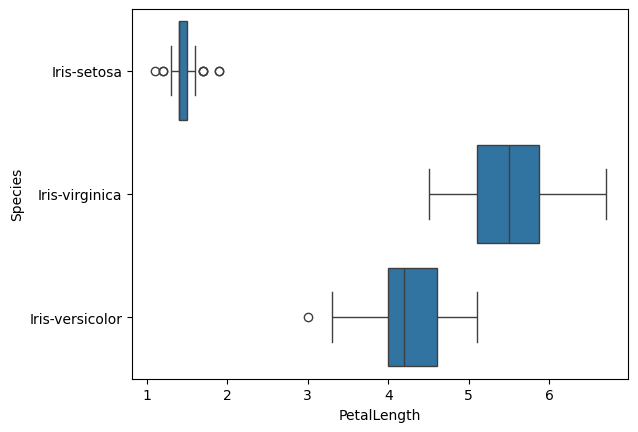

In [11]:
sns.boxplot(data = df_iris_train, x = df_iris_train["PetalLength"], y=df_iris_train["Species"])

What can we tell about the relative differences of the distributions for each species by Petal Length in our sample?

<Axes: xlabel='PetalWidth', ylabel='Species'>

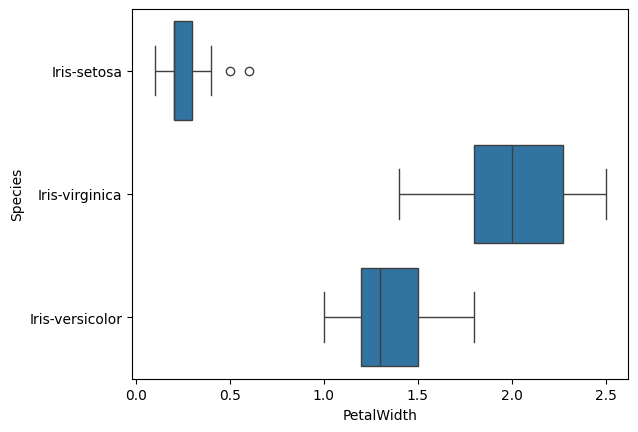

In [14]:
sns.boxplot(data = df_iris_train, x = df_iris_train["PetalWidth"], y=df_iris_train["Species"])


What can we tell about the relative differences of the distributions for each species by Petal Width in our sample?

<Axes: xlabel='SepalLength', ylabel='Species'>

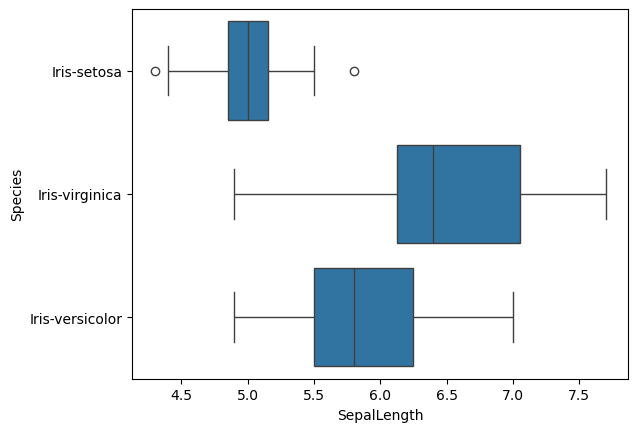

In [12]:
sns.boxplot(data = df_iris_train, x = df_iris_train["SepalLength"], y=df_iris_train["Species"])

What can we tell about the relative differences of the distributions for each species by Sepal Length in our sample?

<Axes: xlabel='SepalWidth', ylabel='Species'>

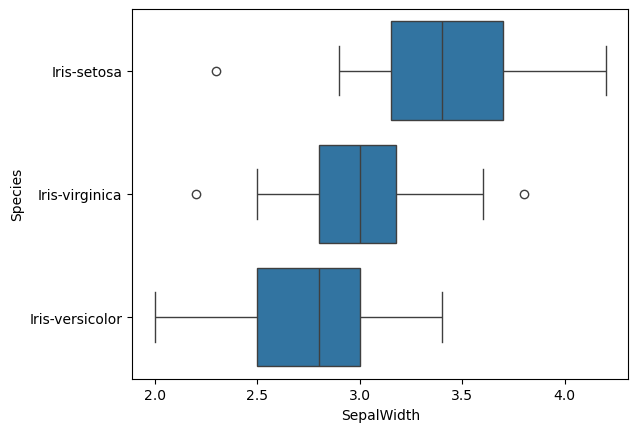

In [13]:
sns.boxplot(data = df_iris_train, x = df_iris_train["SepalWidth"], y=df_iris_train["Species"])

What can we tell about the relative differences of the distributions for each species by Sepal Width in our sample?

## Feature(s) vs Feature(s)
Let's now compare features with each other, in this case we will be comparing numeric features against each other (because all of Iris' non-target variables / attributes are numeric, specifically **ratio** variables)

<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

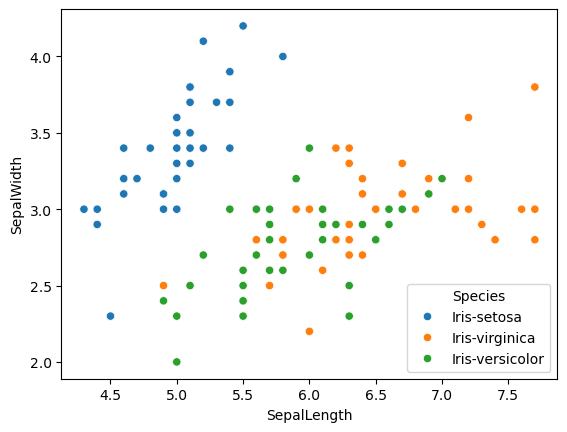

In [14]:
sns.scatterplot(x='SepalLength', y='SepalWidth',
                hue='Species', data=df_iris_train)

The above scatterplot seems to suggest that:
* Setosa has smaller sepal lengths but larger sepal widths than the other species in the sample
*Versicolor is roughly in the middle of the other two species in the sample in terms of their sepal length and width, with some overlap
* Virginica tends to have greater sepal lengths but smaller sepal widths than setosa

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

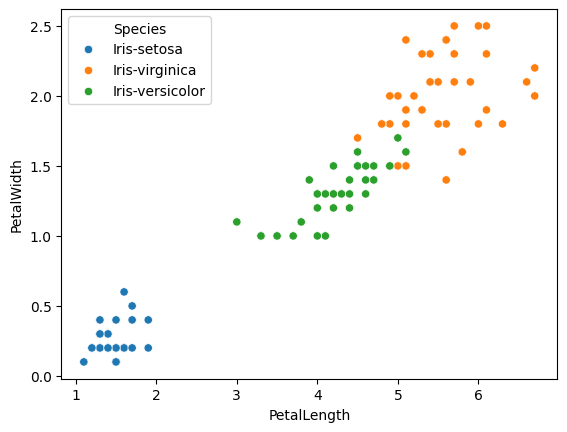

In [18]:
sns.scatterplot(x='PetalLength', y='PetalWidth',
                hue='Species', data=df_iris_train)

The above scatterplot seems to suggest that:
* Setosa has far smaller petal lengths and widths than the other two species in the sample
* Versicolor again seems to lie roughly in the middle of the other two species within the sample in terms of its petal length and width
* Virginica has the largest of petal lengths and widths of the species in the sample

We can also produce a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) that contains scatter graphs comparing each variable as well as a plot of the data distribution per Species

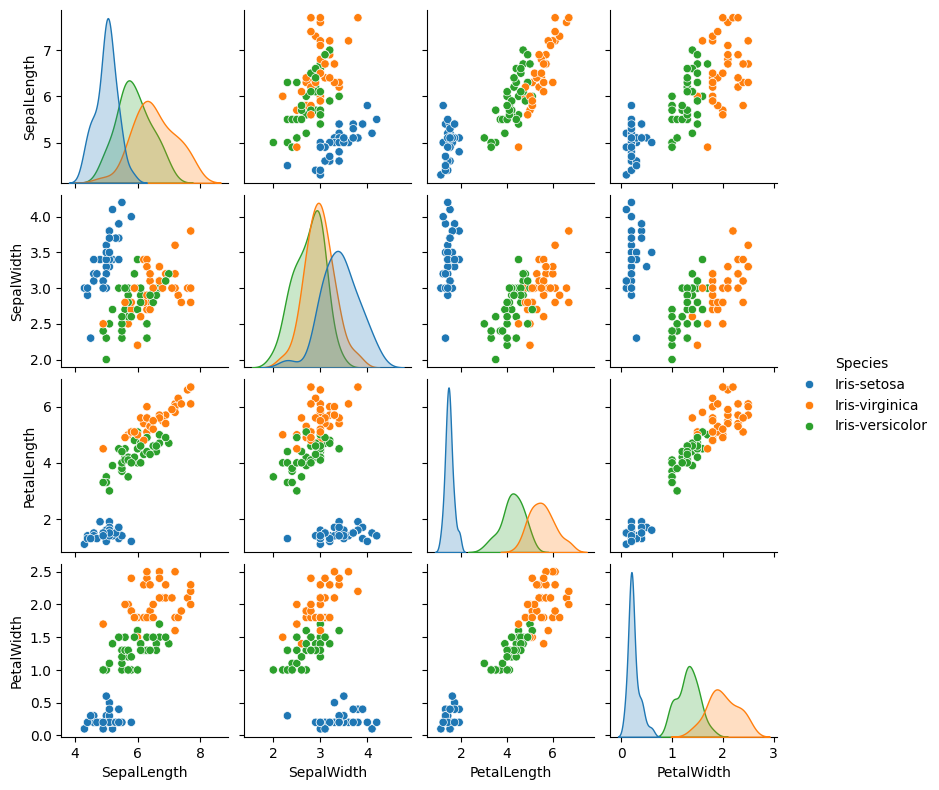

In [19]:
sns.pairplot(df_iris_train,
             hue='Species', height=2)

# Correlation analysis

[Correlation](https://simple.wikipedia.org/wiki/Correlation) is a measure of the degree to which two variables/attributes possess a linearl relationship. This is very important step in exploratory data analysis of bivariate data. In the broadest sense correlation is actually any statistical relationship, whether [causal](https://simple.wikipedia.org/wiki/Causality) or not, between two variables.

Pandas provides three measures of correlation that can be calculated on dataframes:


*   [Pearson's correlation](https://simple.wikipedia.org/wiki/Pearson_correlation_coefficient)
*   [Spearman's](https://simple.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) rank correlation
*   Kendall's [rank correlation](https://simple.wikipedia.org/wiki/Rank_correlation)


Pearson's is the standard measure of correlation to identify linear relationships between variables and will be the primary focus of our investigation examples currently.


In [20]:
?df_iris_train.corr


In [ ]:
# We can find the pairwise correlation of all attributes in the dataframe by using the corr method
# We will select pearson correlation to see if there are any simple
# linear relationships that can be identified amongst variables
df_iris_corr = df_iris_train.corr(method='pearson')
df_iris_corr

<ipython-input-71-b9067ea7b0b1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris_corr = df_iris_train.corr(method='pearson')


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.061632,0.860562,0.794813
SepalWidth,-0.061632,1.000000,-0.383181,-0.316023
PetalLength,0.860562,-0.383181,1.000000,0.960011
PetalWidth,0.794813,-0.316023,0.960011,1.000000


Now let's create a heatmap to visualise these results.
A video on using heatmap plots to visualise correlations within Seaborn can be found [here](https://www.youtube.com/watch?v=J7cd1-g1O7A)

In [21]:
# We can generate a heatmap to visualise the pairwise correlations of these variables
# The diagonal gives us a pearson correlation of '1'
# which shows that the variables are perfectly correlated
# this is to be expected as we are comparing variables agains themselves

# The highly correlated variables
# (assuming that "high correlation" means a pearson value of >= 0.7)
# are:
# Petal Length and Petal Width
# Sepal Length and Petal Length
# Sepal Length and Petal Width
sns.heatmap(df_iris_corr, annot=True)

NameError: name 'df_iris_corr' is not defined

# Data Pre-processing
When we start building our machine learning models proper, we will be utilising various data [pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) techniques to **clean**, **transform** and **reduce** our data to make it more appropriate for training supervised learning models.

The general process of data pre-processing can be grouped into four parts:
1.   Data Cleaning
  * Handling Missing Data
  * Handling Noisy data
  * Handling Outliers
2.   Data Transformation
  * Encoding
  * Scaling
3.   Data reduction
  * Reducing dimensions of our data
4.   Assess quality of data

For today's lab we will focus on two aspects of this, before we cover it in more depth in the coming weeks:


*   Identifying missing data for a variable / attribute
*   Encoding nominal variables / attributes for appropriate representation to the ML algorithm



## Checking for missing values

In [22]:
df_iris.isnull().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0
Species,0


In [23]:
df_iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding of nominal variables
Remember the "levels of measurement" that we introduced previously? Well one of the many ways that understanding levels of measurement / statistical data types is useful is when we wish to represent our data to Machine Learning models.

For example, take the "Species" attribute of the Iris data set, we have three distinct nominal category values

In [24]:
df_iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df_iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For people this kind of representation of the data is fine, we have our individual feature variables and our target variable "Species" is a nominal variable where we can tell from a glance what category each record belongs to (in other words, what species each row is a member of).


But in Machine Learning this way of representing our data can sometimes cause problems.

Below are some common ways of encoding nominal values:
* [One hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* Dummy variable encoding
* Hash encoding

We will explore more on these encodings in the coming weeks when we are building **regression** and **classification** models

# A taster example: Iris EDA

Let's consider Iris in particular, based on the data we have what kind of specific questions could we ask?
*   What is the difference in petal length based on Iris species?
*   What is the difference in petal width based on Iris species?
*   What is the difference in sepal length based on Iris species?
*   What is the difference in sepal width based on Iris species?
*   Is a larger petal length positively associated with larger petal width?
*   Is a larger sepal length positively associated with a larger sepal width?

In [26]:
# Downloaded from UCI Machine learning repository
# https://archive.ics.uci.edu/ml/datasets/iris
# "Data Folder" -> iris.data
# "Data Folder" -> iris.names will give us some more data on the attributes

df_iris = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/iris.data',
                        names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# We'll now use the train-test splitter inside the SKLearn package to give us two subsets of data
# one for training and one for testing, divided into the
# features (the X values) and the targets (the Y values)
# the \ allows us to have a line break in the code
X = df_iris.drop(columns = ['Species'], axis = 1)
y= df_iris['Species']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# The dataframe with all our test data
# we will save this for later
df_iris_test = X_test
df_iris_test["Species"] = y_test

In [30]:
# The dataframe with all our training data
# we will use this for EDA
# and model building
# Note: be careful, the smaller the dataset (in terms of records)
# the more likely that the train and test samples might have larger differences
df_iris_train = X_train
df_iris_train["Species"] = y_train
df_iris_train

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
4,5.0,3.6,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [31]:
# What is the shape of the dataset?
# Iris has 150 records with 5 attributes
df_iris.shape

(150, 5)

In [32]:
# What are the names of those attributes
# and what are the programming types that they are encoded as?

# We could check this using dtypes
df_iris.dtypes

,0
SepalLength,float64
SepalWidth,float64
PetalLength,float64
PetalWidth,float64
Species,object


In [33]:
# But the info method often gives us more information
# Including the amount of non-null values for each variable
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
# Let's take a look at the first 10 records
df_iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


What can we tell about the Iris data set from our analysis so far?


*   There are 150 instances / records
*   There are 5 attributes / variables / columns
*   No columns contain null values
*   Four of our columns are encoded with numeric programming types, all of them being 64 bit floating point numbers (double)
*   A single column is encoded as an "object" type, this is likely to contain nominal / categorical data





In [35]:
# Now let's look at our training subset
df_iris_train.shape

(112, 5)

In [36]:
# Viewing some basic statistics for the Iris data set
df_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What insights have we obtained so far?
* The amount of non-null values for each numeric attribute
* The mean average value for each numeric attribute
* The standard deviation (a measure of dispersion) for each attribute
  * In particular, we can note that the attribute with the largest std dev is Petal length, suggesting that the values for this attribute should be quite widely spread out / **dispersed**
* The minimum value for each attribute
* The 25th, 50th (median) and 75th percentiles for each attribute
  * 75% of the data for Petal Width seems to fall between 0.1 and 1.8 cm
* The maximum value for each attribute
  * Notice how petal width seems to have both the smallest minimum value and the smallest maximum value?

In [37]:
# Let's now check to see if any records are duplicated (have the same values)
df_iris[df_iris.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


We have 3 duplicated records, sometimes duplicated records can lead to problems (especially in the case when there are imbalances in the amount of records for each target class when dealing with classification problems)

Further discussion can be found [here](https://www.site.uottawa.ca/~nat/Workshop2003/imbalance-kolcz.pdf) and [here](https://stats.stackexchange.com/questions/283170/when-is-unbalanced-data-really-a-problem-in-machine-learning?noredirect=1&lq=1)

In [38]:
# Let's check whether our nominal attributes are "balanced"
# (i.e. do we have roughly the same amount of records for each category?)
df_iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


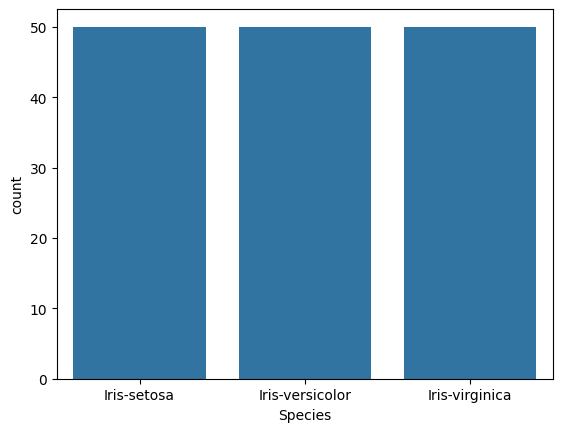

In [39]:
sns.countplot(data = df_iris, x ="Species");

So it seems the species classes are balanced (with each class having 50 records).

How about our training set?

In [40]:
df_iris_train["Species"].value_counts()

,count
Species,
Iris-versicolor,39
Iris-virginica,38
Iris-setosa,35


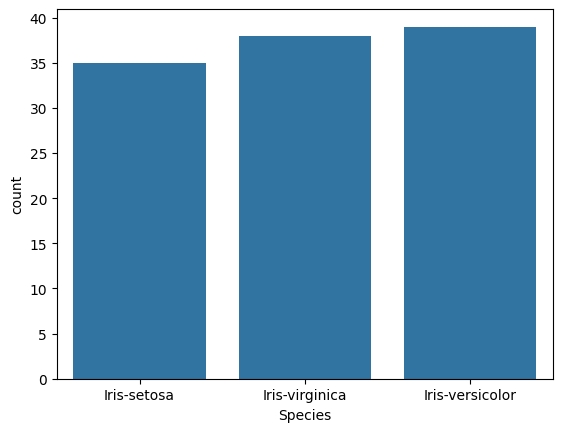

In [41]:
sns.countplot(data = df_iris_train, x = "Species");

A "roughly" balanced spread, no nominal category seems to be too heavily represented in comparison to others (at least at a glance)

Now let's have a look at some of the individual feature variables by performing some univariate analysis on our training sample

<Axes: xlabel='PetalLength'>

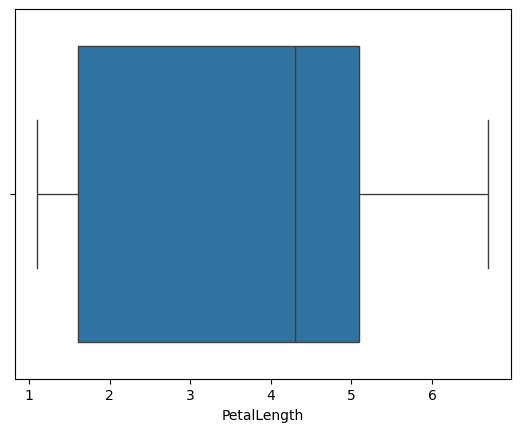

In [42]:
# The overall distribution across all classes
sns.boxplot(df_iris_train["PetalLength"], orient='h')

What does this tell us about the data being investigated?

<Axes: xlabel='PetalLength', ylabel='Species'>

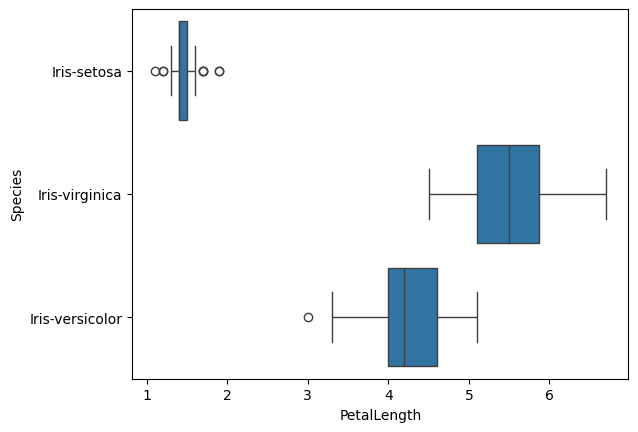

In [43]:
sns.boxplot(data = df_iris_train, x = df_iris_train["PetalLength"], y=df_iris_train["Species"])

What does this tell us about the data being investigated?

<Axes: xlabel='PetalWidth'>

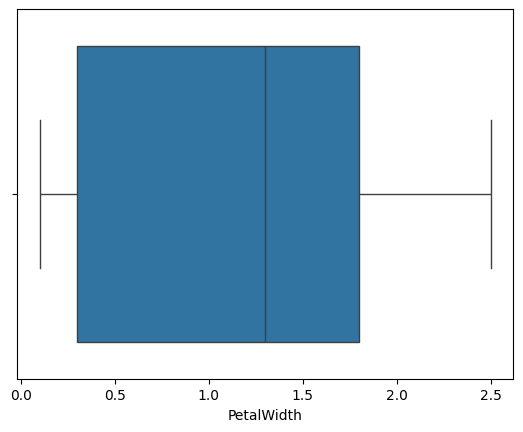

In [44]:
# The overall distribution across all classes
sns.boxplot(df_iris_train["PetalWidth"], orient ='h')

What does this tell us about the data being investigated?

<Axes: xlabel='PetalWidth', ylabel='Species'>

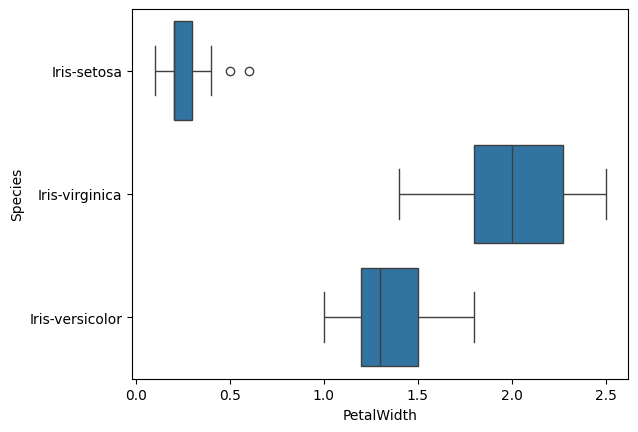

In [45]:
sns.boxplot(data = df_iris_train, x = df_iris_train["PetalWidth"], y=df_iris_train["Species"])

What does this tell us about the data being investigated?

<Axes: ylabel='SepalLength'>

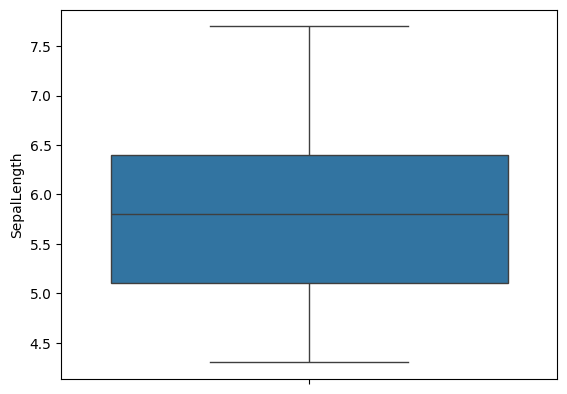

In [46]:
# The overall distribution across all classes
sns.boxplot(df_iris_train["SepalLength"])

What does this tell us about the data being investigated?

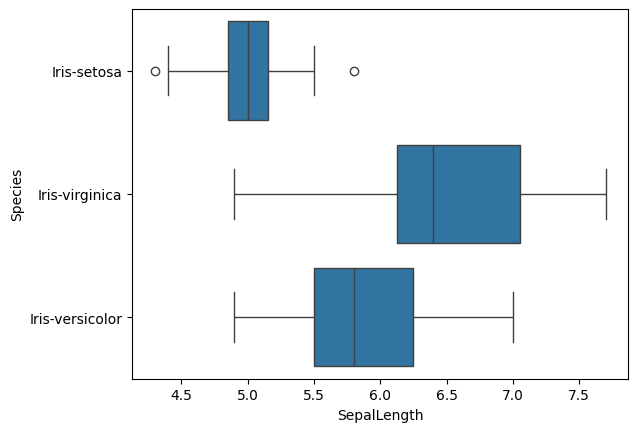

In [47]:
sns.boxplot(data= df_iris_train, x = "SepalLength", y="Species");

What does this tell us about the data being investigated?

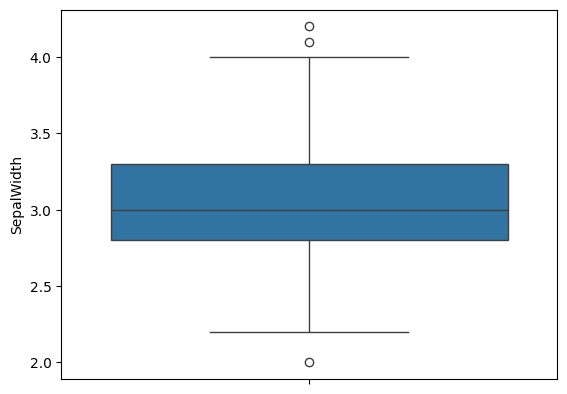

In [48]:
# The overall distribution across all classes
sns.boxplot(df_iris_train["SepalWidth"]);

What does this tell us about the data being investigated?

<Axes: xlabel='SepalWidth', ylabel='Species'>

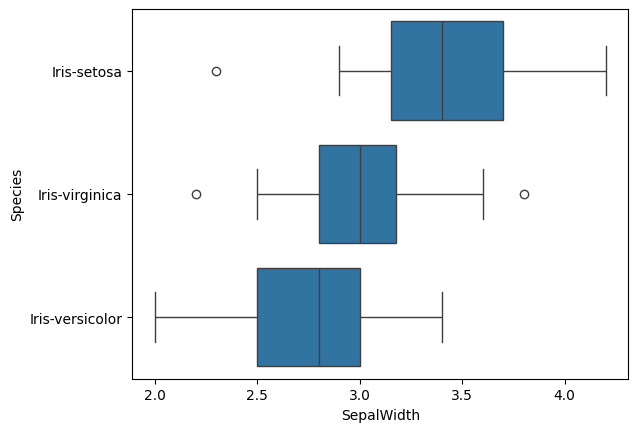

In [49]:
sns.boxplot(data = df_iris_train, x =  df_iris_train["SepalWidth"], y=df_iris_train["Species"])

What does this tell us about the data being investigated?

Let's now look at some bivariate analysis, investigating the relationship between different features

<Axes: title={'center': 'Sepal Length and Sepal Width by Iris Species'}, xlabel='SepalLength', ylabel='SepalWidth'>

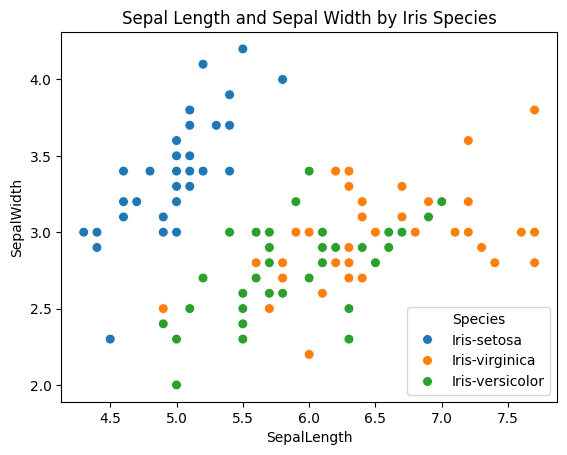

In [50]:
plt.title("Sepal Length and Sepal Width by Iris Species")
sns.scatterplot(data = df_iris_train,
                x = df_iris_train['SepalLength'],
                y = df_iris_train['SepalWidth'],
                hue=df_iris_train['Species'], s=50)

What does this tell us about the data being investigated?

<Axes: title={'center': 'Petal Length and Petal Width by Iris Species'}, xlabel='PetalLength', ylabel='PetalWidth'>

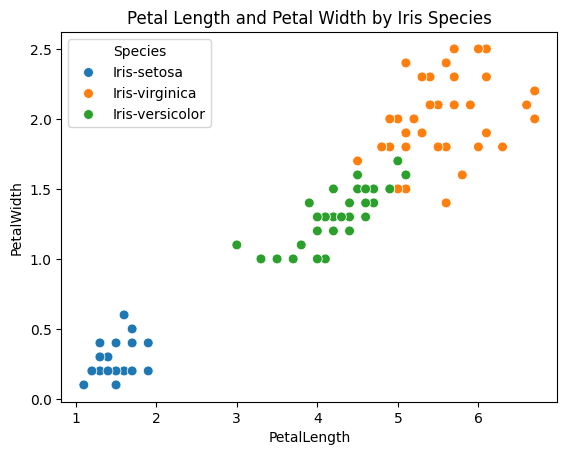

In [51]:
plt.title("Petal Length and Petal Width by Iris Species")
sns.scatterplot(data = df_iris_train,
                x = df_iris_train['PetalLength'],
                y = df_iris_train['PetalWidth'],
                hue=df_iris_train['Species'], s=50)

What does this tell us about the data being investigated?

We could use a pairplot to view the comparisons between our attributes in one plot.

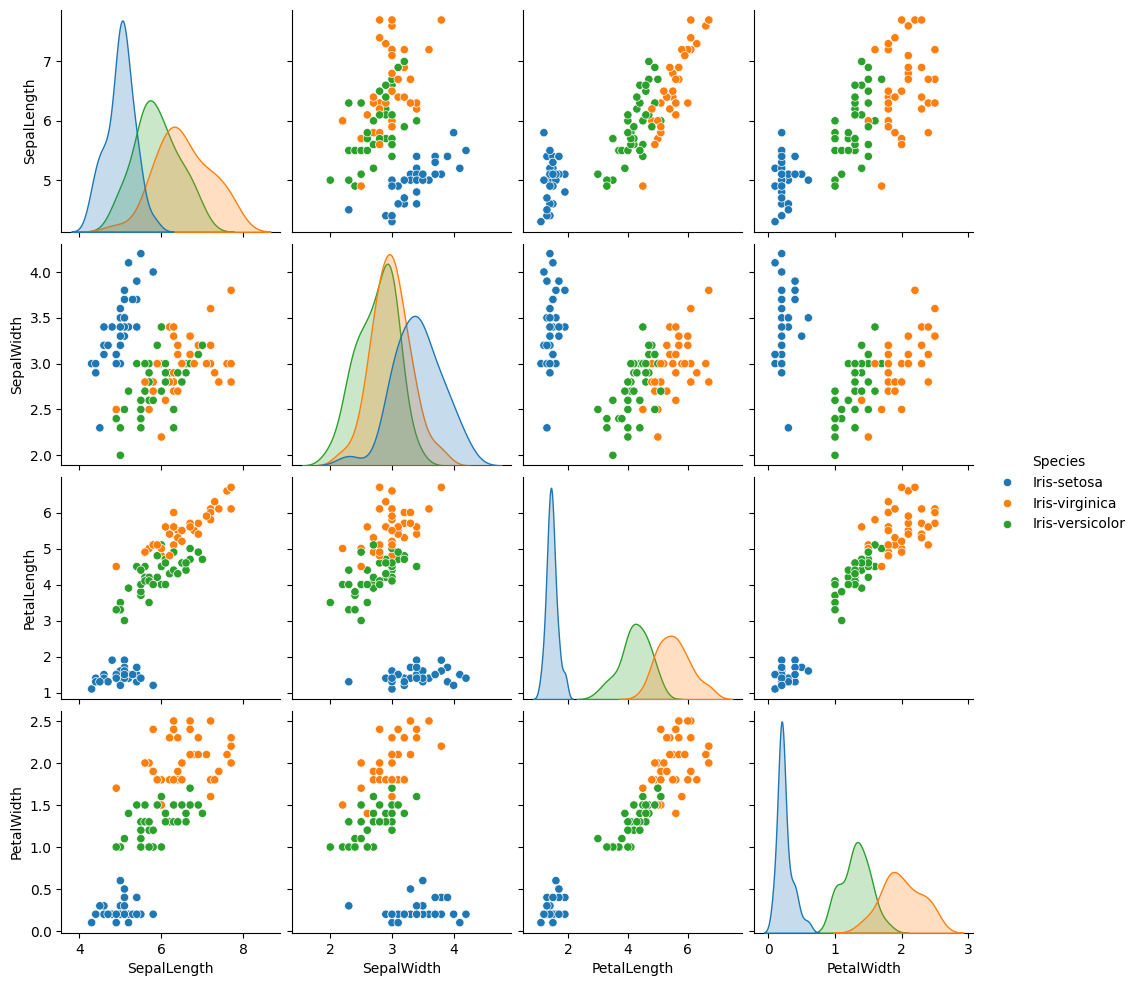

In [52]:
sns.pairplot(df_iris_train,hue="Species")

What does this tell us about the data being investigated?

Now let's look for correlations in our data

In [53]:
sns.heatmap(df_iris_train.corr(), annot=True)

ValueError: could not convert string to float: 'Iris-setosa'

Now let's look for correlations in our data

# Exercises

## Exercise 1

Were we able to produce some possible valuable answers / insights to our previously stated questions about the Iris data set based on our limited EDA example above? Justify your answer




### Sample answers / Tutor comments

Students will want to consider whether the above basic investigation provides sufficient insight when attempting to answer the following questions:

*   What is the difference in petal length based on Iris species?
*   What is the difference in petal width based on Iris species?
*   What is the difference in sepal length based on Iris species?
*   What is the difference in sepal width based on Iris species?
*   Is a larger petal length positively associated with larger petal width?
*   Is a larger sepal length positively associated with a larger sepal width?

## Sample Answer

<details><summary>Click here for the solution</summary>
Looking at the EDA completed for the Iris data set, there are some valuable results which we can use to answer the previously asked questions.

#### What is the difference in petal length based on Iris species?
Using the box plot of the training data, we can clearly see differences in the petal length based on the species of iris. In particular, values for the setosa species are clearly distinct from the other two species.

Virginica and versicolor species see an overlap in petal length, though the standard deviation range of each is distinct.

Setosa has petal lengths from around 1.2-1.6cm, with a vary small range of possible values. Versicolor has petal lengths from 3.2-5.1cm, with virginica from 4.5-6.5cm.

#### What is the difference in petal width based on Iris species?
The box plot shows clear differences between the petal width, based on the Iris species. Again, the setosa species in particular is clearly distinct from the other two.

Verginica and versicolor have petal widths closer to one-another, though the middle 75% of the data for each are distinct from one another.

#### What is the difference in sepal length based on Iris species?
From our box plot, we can see a greater degree of overlap between sepal length and species. This is particularly true comparing virginica and versicolor species, which have similar minimum values and overlapping standard deviation ranges.

Setosa has vales from 4.5-5.5cm, versicolor from 4.8-7cm, and virginica from 4.8-7.8cm.

#### What is the difference in sepal width based on Iris species?
The range of values for sepal width across all values is quite small, from 2-4.5cm.

From the box plot, we can see a large overlap between versicolor and virginica, though versicolor generally has a lower value for sepal width out of the two. Setosa, on average, has the largest sepal width.

The range of values for setosa is 2.8-4.8cm, virginica from 2.5-3.7cm, and versicolor from 2-3.3cm.

#### Is a larger petal length positively associated with larger petal width?
Our scatter plot comparing petal length and width suggests there is positive correlation between the two. This is confirmed in our heatmap, which gives a value of 0.96 for the correlation between these two series.

We can conclude that a larger petal length is positively associated with larger petal width.

#### Is a larger sepal length positively associated with a larger sepal width?
The scatter plot of the sepal length vs width shows little trend; certainly, a trend is not noticable.

The heatmap gives a very small negative correlation, which indicates there is little to no association between the two series.

Therefore, we can conclude that a larger sepal width is not positively correlated with sepal length.

</details>


## Exercise 2

In terms of nominal / categorical variables, what is a [mosaic plot](https://datavizcatalogue.com/methods/marimekko_chart.html) and why would it be a useful visualisation when dealing with nominal values?

### Sample answers / Tutor comments
Key points students answers could make:
* Mosaic plots / Marimekko plots allow us to visualise pairs of nominal / categorical variables.
* We can detect relationships between categories and subcategories based on the data plotted on the two axes




<details><summary>Click here for the solution</summary>
A mosaic plot, or Marimekko chart, plots data for two variables across multiple series. It allows multiple comparisons to be made between categorical data in a single plot.

The width of each series in the plot can be used to compare the value count between the two, with the stacked bar splitting the series into a count of each of the values present for this series. This gives an overview of the distribution of values within the series. Comparing this to a second series can highlight differences between the two, and indicate the distribution of values through the data set.

Nominal data is categorical data that doesn't not have any order, which excludes many comparisons and plot types. This makes the mosaic plot a useful option for comparing nominal data.

</details>


## Exercise 3

What is the difference between the kinds of linear relationships that Pearson's correlation is capable of modelling with the kind of relationships that Spearman's rank correlations are capable of modelling?

Hint: the following [link](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8) may help to explain some more of the basics





### Sample answers / Tutor comments

Students should produce an answer that discusses:
* Pearson's use for modelling the linear relationships between variables - the more keen may also discuss the normal distribution / parametric assumptions.
* When discussing Spearman's correlation they should mention that it allows us to capture a monotonic relationship between variables
* Spearman is a rank correlation measure and therefore deals with the values being rank ordered instead of the specific raw base values.



<details><summary>Click here for the solution</summary>


Pearson's correlation is only capable of analysing the linearity of the relationship between two series. When one value changes, Pearson's correlation models the change seen in the other value.

Spearman's rank works where correlation is linear, but also works on data with a monotonic relationship. That is, data where the size of the value change can be variable. It is therefore more concerned about the overall direction of change through the data set, than the proportionality between the two axis.

A Spearman's correlation value that is greater than the Pearson's correlation value could indicate a logarithmic data set, which could be normalised to produce a more linear data set to work with later on.
</details>



## Exercise 6

Choose one of the datasets you have created train / test splits for and attempt to create your own exploratory data analysis of them using the training sample.

You should:
*   Show the shape of the sample training dataset being used and compare this with the shape of the overall dataset
*   Perform univariate analysis to better understand the "target" variable of the dataset (the variable that we would try to predict in a supervised learning problem)
*  Perform univariate analysis to better understand the "feature" variables of the dataset (the variables that would be provided to the machine learning model when trying to predict the target)
*   Consider what levels of measurement would be appropriate choices for each of the variables / attributes
*   Come up with at least 3 questions you could ask / explore about the data that allows you to understand the relationship of a feature variable with the target
*   Come up with at least 2 questions you could ask / explore about the data that allows you to understand the relationship between a pair of feature variables
*   Attempt to answer those questions using a combination of univariate analysis, multivariate analysis and correlation analysis

## Exercise 7
Present your findings to at least one other student and review their EDA work also (this could be using a different data set).

Try to identify at least 2 questions you ask about your colleagues dataset that have not been noted / answered by your colleague's EDA

What techniques might you use to investigate these questions?

### Sample answers / Tutor comments
An opportunity for [Peer learning](https://en.wikipedia.org/wiki/Peer_learning), prompt them to share ideas / understanding of the data and topics at hand with each other.

## Exercise 8
What kind of questions could you ask about your own coursework dataset?
  * What kind of relationships could you try to investigate between features and the target?
  * What kind of relationships could you try to investigate between various features?

### Sample answers / Tutor comments
Use the opportunity to discuss with the students how they are approaching EDA with their dataset

# Linear Regression

## Description :
The goal of this Task is to use the `sklearn` package to fit a **Linear Regression** on [`advertising.csv`](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493822) datafile.



## Data Description:

## Instructions:
- Use `train_test_split()` function to split the dataset into training and testing sets
- Use the `LinearRegression` function to make a model
- Fit the model on the training set
- Predict on the testing set using the fit model
- Estimate the fit of the model using `mean_squared_error` function
- Plot the dataset along with the predictions to visualize the fit

## Hints:

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" target="_blank">mean_squared_error()</a>
Computes the mean squared error regression loss

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a>
Plot y versus x as lines and/or markers



In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [56]:
# Read the data from the file "Advertising.csv"
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/advertising.csv')

In [57]:
# Take a quick look at the data
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [58]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Simple Linear Regression

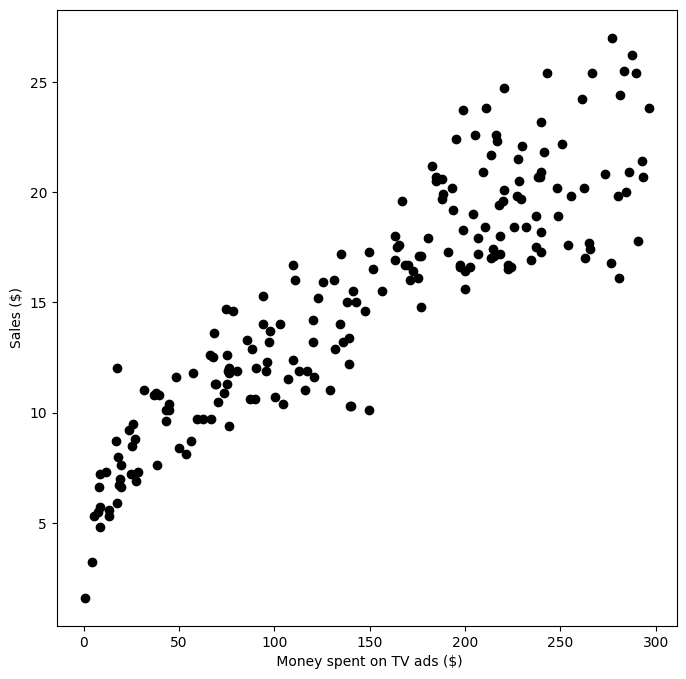

In [59]:
plt.figure(figsize=(8,8))
plt.scatter(df['TV'], df['Sales'], c = 'black')
plt.xlabel(' Money spent on TV ads ($)')
plt.ylabel('Sales ($)')

plt.show()

In [60]:
# X = data['TV'].values.reshape(-1,1)
# y = data['sales'].values.reshape(-1,1)

In [61]:
# Assign TV advertising as predictor variable 'X'
X = df[['TV']]

# Set the Sales column as the response variable 'y'
y = df['Sales']

In [62]:
# Split the dataset in train and test data with 80% training set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
# Initialize a Linear Regression model using Sklearn
model = LinearRegression()

# Fit the linear model on the train data
model.fit(X, y)

# Peedict on the test data using the trained model
y_pred = model.predict(X)


In [64]:
### edTest(test_mse) ###
# Compute the MSE of the predicted test values
mse = mean_squared_error(y_pred, y)

# Print the computed MSE
print(f'The test MSE is {mse}')


The test MSE is 5.2177438977951285


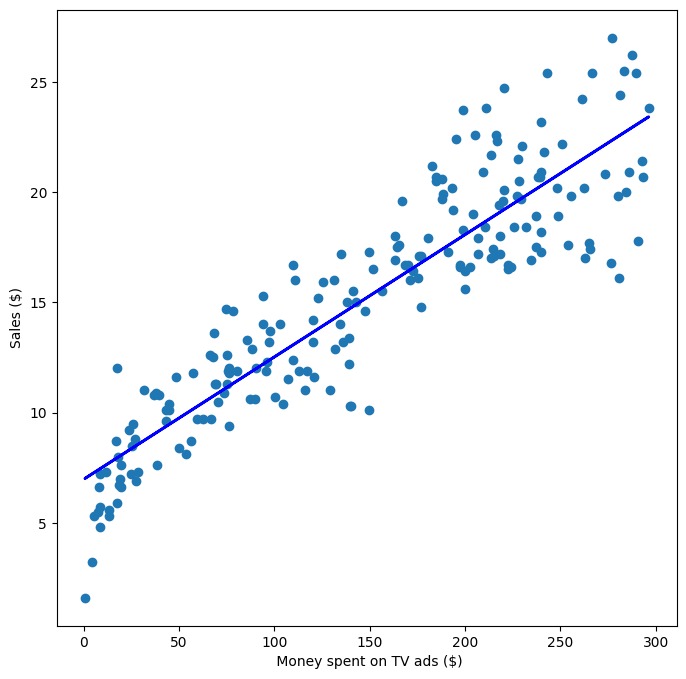

In [65]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y)
# Make a plot of the data along with the predicted linear regression

plt.plot(X, y_pred, c = 'blue', linewidth = 2)
plt.xlabel(' Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show()

# Additional Challenges

Please assess the previously mentioned linear regression using a dataset of your own choice, such as the [car_price](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493823) dataset.

In [66]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [67]:
# load data to a dataframe
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/car_price.csv')

In [68]:
# check the shape
df.shape

(205, 26)

In [69]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [71]:
# check unique data for each feature in the data frame
df.nunique()

,0
ID,205
symboling,6
name,147
fueltypes,2
aspiration,2
doornumbers,2
carbody,5
drivewheels,3
enginelocation,2
wheelbase,53


In [72]:
# columns names of the dataframe
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [73]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Now, we can prepare the data for the linear regression model

In [74]:
df['enginesize'].head()

,enginesize
0,130
1,130
2,152
3,109
4,136


In [75]:
# create a new simple dataframe using the existing one
df = df[['enginesize', 'price']]
df.head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


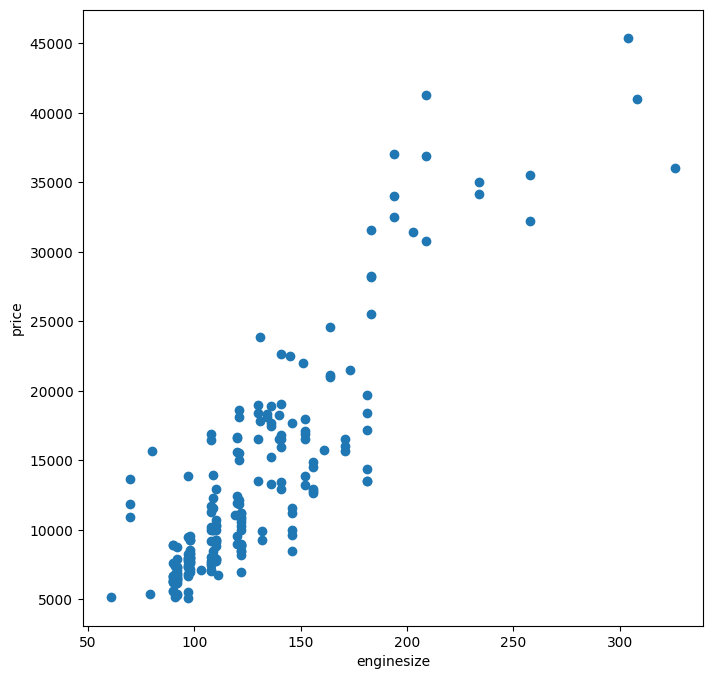

In [76]:
# check the distribution of data by plotting a scatter
plt.figure(figsize = (8, 8))
plt.scatter(x = df['enginesize'], y = df['price'])
plt.xlabel('enginesize')
plt.ylabel('price')

plt.show()


In [77]:
# define X and y
X = df['enginesize']
y = df['price']

In [78]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,
                                                    random_state=42)

In [80]:
# Shapes of splitted data - sizes of the X_train and y_train should be same. Also test.
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (164,)
X_test:  (41,)
y_train:  (164,)
y_test:  (41,)


In [81]:
# create a linear regression model
clf = LinearRegression()

In [82]:
# train the model using training data
# since we have only one independent variable, we should use 'values.reshpae(-1,1)
X_train = X_train.values.reshape(-1, 1)

In [83]:
clf.fit(X_train, y_train)

LinearRegression()

In [84]:
# print coefficient
clf.coef_

array([165.84456256])

In [85]:
# print y_intercept | bias
clf.intercept_

-7741.765067166594

In [86]:
# make predictions using test data
y_pred = clf.predict(X_test.values.reshape(-1, 1))

In [87]:
# Let's calculate the metrics
# Means Squared Error (MSE)
mse = mean_squared_error(y_pred, y_test)
print("MSE ----> ", mse)

MSE ---->  15465458.96590847


In [88]:
# Root Mean Squared Error (RMSE)
import math
rmse = math.sqrt(mse)
print('RMSE ----- > ', rmse)

RMSE ----- >  3932.614774664367


In [89]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pred, y_test)
print('MAE == > ', mae)

MAE == >  2748.6947032901094


In [90]:
# R squared (R2)
r2 = r2_score(y_pred, y_test)
print('R2 ----> ', r2)

R2 ---->  0.7338146014506945


In [91]:
# print them all
print("MSE ----> ", mse)
print('RMSE ----- > ', rmse)
print('MAE == > ', mae)
print('R2 ----> ', r2)

MSE ---->  15465458.96590847
RMSE ----- >  3932.614774664367
MAE == >  2748.6947032901094
R2 ---->  0.7338146014506945


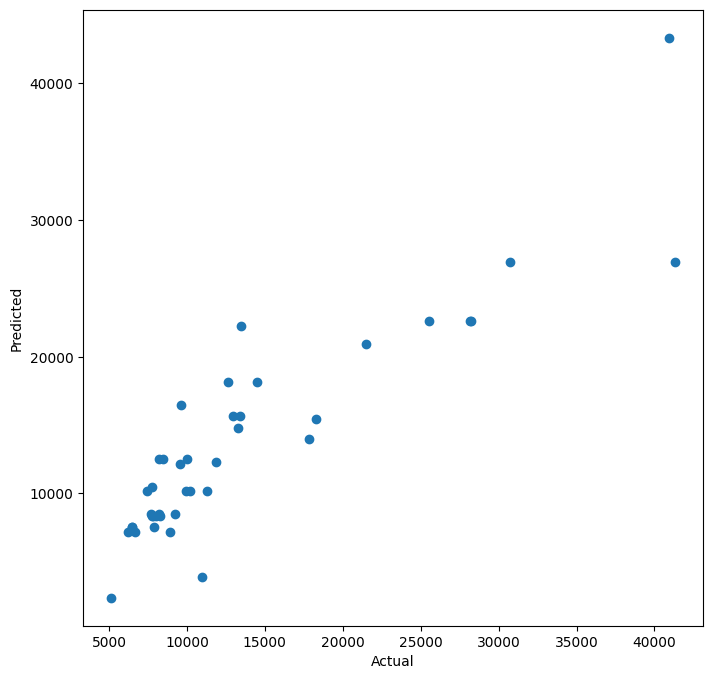

In [92]:
# plot actual and predicted values
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [93]:
?sns.regplot

<Axes: xlabel='price'>

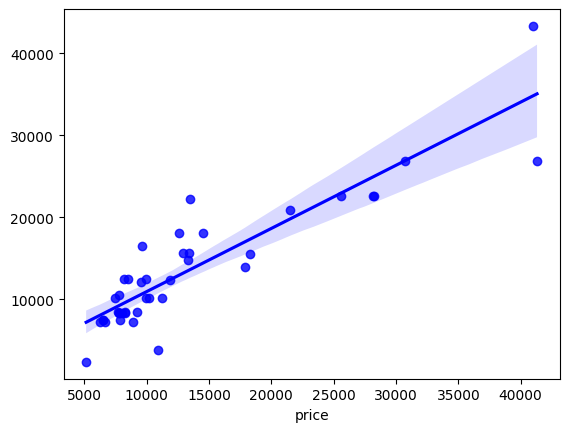

In [94]:
# plot regression model line
sns.regplot(x = y_test, y = y_pred, color= 'blue')